In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_csv("../assets/csv-files/maths.csv")
dataset.head(3)

,Number1,Number2,Number3,Total Sum
0,971.844377,1760.131196,1689.181218,4421.15679
1,NaN,NaN,NaN,0.00000
2,NaN,NaN,NaN,0.00000


In [3]:
# Check for null values
dataset.isnull().sum()

Number1      454
Number2      915
Number3      931
Total Sum    499
dtype: int64

In [4]:
# Drop all null values
dataset.dropna(inplace=True)

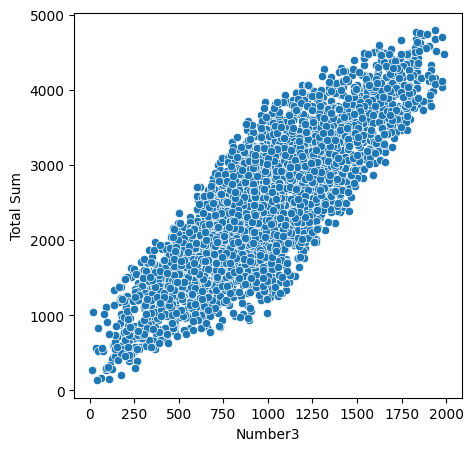

In [5]:
# Visualize data
plt.figure(figsize=(5,5))
sns.scatterplot(x="Number3", y="Total Sum", data=dataset)
plt.show()

In [6]:
# Seperate required dependent and independent data
x = dataset[["Number3"]]
y = dataset["Total Sum"]

In [7]:
# Train test split
from sklearn.model_selection import train_test_split

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [9]:
# Build the SVM model (Regression)
from sklearn.svm import SVR

In [10]:
svr = SVR(kernel="linear")
svr.fit(x_train, y_train)

SVR(kernel='linear')

In [11]:
svr.score(x_test, y_test)

0.7188879978330487

In [12]:
# Check if the model is overfitted
svr.score(x_train, y_train), svr.score(x_test, y_test)

(0.7286219118945472, 0.7188879978330487)

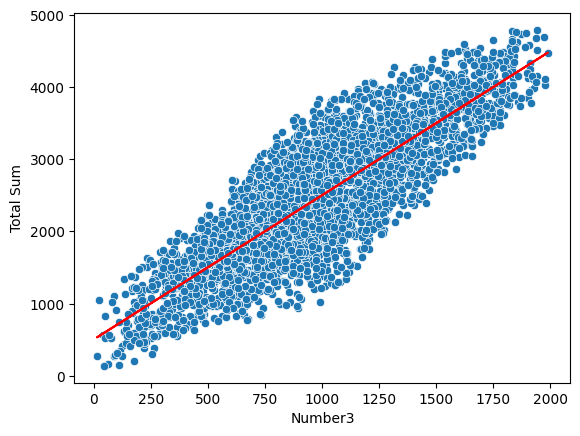

In [13]:
# Visualize the prediction line
sns.scatterplot(x="Number3", y="Total Sum", data=dataset)
plt.plot(dataset["Number3"], svr.predict(x), color="red")
plt.show()